In [8]:
# Se importan las librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [13]:
# Se cargan los datos de los clientes del centro comercial
customers = pd.read_csv('Mall_customers.csv')
# Se mira una muestra del conjunto de datos
customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
# Se verifica la forma del conjunto de datos
customers.shape

(200, 5)

In [21]:
# Se verifica si el conjunto de datos tiene datos faltantes
customers.isnull().any().any()

False

In [47]:
# Se obtienen los datos para el entrenamiento
X_train = customers[['Annual Income (k$)', 'Spending Score (1-100)']]

In [48]:
# Se verifica la forma de X_train
X_train.shape

(200, 2)

In [71]:
# Antes de entrenar nuestro modelo se necesita encontrar los valores para MinPoints y Epsilon

# Si el conjunto de datos es bidimensional se utiliza un MinPoints de 4
# En caso contrario se calcula como MinPoints = 2*dimensiones

# Para obtener el valor de Epsilon se calculala distancia entre cada instancia y su vecino más cercano usando nearest neighbors
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=2).fit(X_train)
distances,_ = nbs.kneighbors(X_train)

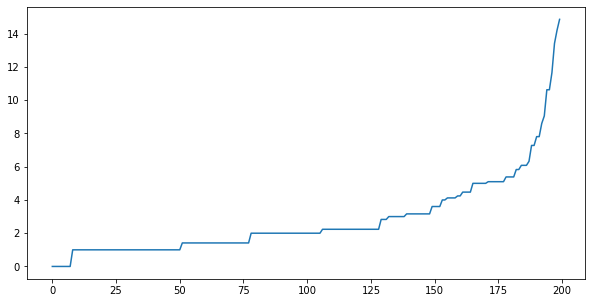

In [72]:
# Se realiza un plot de los datos
distances = np.sort(distances, axis = 0)
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(distances)
plt.show()
# La máxima curvatura de la curva se produce en 8

In [73]:
# Se eligen MinPts = 4 y Epsilon = 8
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(X_train)
labels = dbscan.labels_

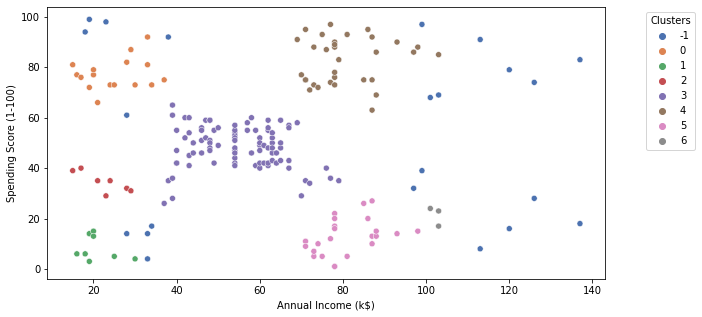

In [74]:
# Se diagraman los clusters
p = sns.scatterplot(data = X_train, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = dbscan.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()
